In [1]:
#(1)匯入套件
from statistics import mode
from turtle import title
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(3)

In [2]:
#(2)匯入資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
#(3)convert 2-D 28x28 image to 4-D nx28x28x1 array
X_Train4D=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')
x_Test4D=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')

In [4]:
#normalize the image numbers to 0~1
X_Train4D_normalize=X_Train4D/255
x_Test4D_normalize=x_Test4D/255
print(X_Train4D_normalize.shape) #(60000, 28, 28, 1)
print(x_Test4D_normalize.shape)  #(10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#(4)convert label numbers to one-hot encoding
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)
print(y_TrainOneHot.shape) #(60000, 10) 
print(y_TestOneHot.shape)  #(60000, 10) 

(60000, 10)
(10000, 10)


In [6]:
#(5)Use a Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model=Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))
#以下是額外增加的
model.add(MaxPooling2D(pool_size=(2,2))) #4個找最大值，有這個可以降維度1/4
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #4個找最大值，有這個可以降維度1/4，另外跟上面就是1/16<備註他是相乘的>
model.add(Dropout(0.25))
model.add(Flatten())
#以下也是額外增加的
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [7]:
#(6)Model training
#編譯，設定損失函數、優化器、指標
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['acc']) #注意metrics[]舊版是acc 新版是accuracy

train_history=model.fit(x=X_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=50,batch_size=300,verbose=2)

Epoch 1/50
160/160 - 5s - loss: 0.5081 - acc: 0.8403 - val_loss: 0.0986 - val_acc: 0.9704 - 5s/epoch - 28ms/step
Epoch 2/50
160/160 - 1s - loss: 0.1404 - acc: 0.9581 - val_loss: 0.0651 - val_acc: 0.9802 - 1s/epoch - 8ms/step
Epoch 3/50
160/160 - 1s - loss: 0.1018 - acc: 0.9698 - val_loss: 0.0537 - val_acc: 0.9849 - 1s/epoch - 8ms/step
Epoch 4/50
160/160 - 1s - loss: 0.0807 - acc: 0.9753 - val_loss: 0.0462 - val_acc: 0.9865 - 1s/epoch - 8ms/step
Epoch 5/50
160/160 - 1s - loss: 0.0670 - acc: 0.9801 - val_loss: 0.0407 - val_acc: 0.9883 - 1s/epoch - 8ms/step
Epoch 6/50
160/160 - 1s - loss: 0.0602 - acc: 0.9817 - val_loss: 0.0379 - val_acc: 0.9890 - 1s/epoch - 8ms/step
Epoch 7/50
160/160 - 1s - loss: 0.0536 - acc: 0.9841 - val_loss: 0.0371 - val_acc: 0.9901 - 1s/epoch - 8ms/step
Epoch 8/50
160/160 - 1s - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0347 - val_acc: 0.9895 - 1s/epoch - 8ms/step
Epoch 9/50
160/160 - 1s - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0346 - val_acc: 0.9907 - 1s/epoch - 

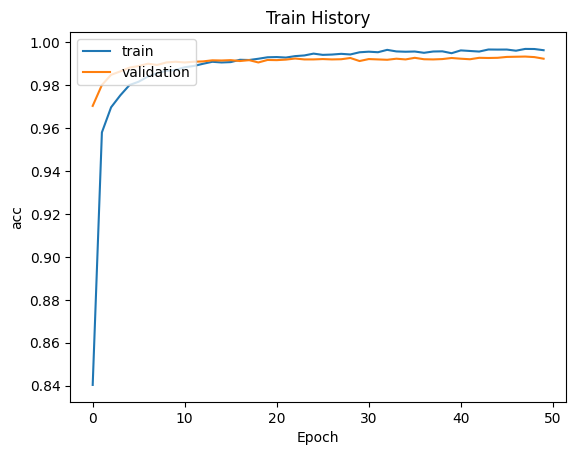

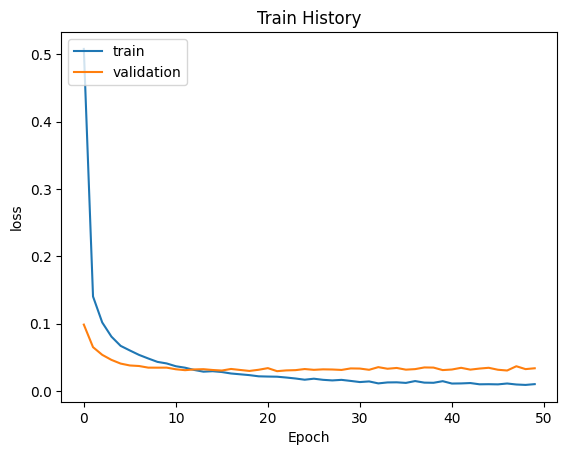

In [8]:
#(7)Training history
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [9]:
#(8)Accuracy
score=model.evaluate(x_Test4D_normalize,y_TestOneHot)
print('accuracy=',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0243 - acc: 0.9931
accuracy= 0.9930999875068665


313/313 [==============================] - 1s 3ms/step


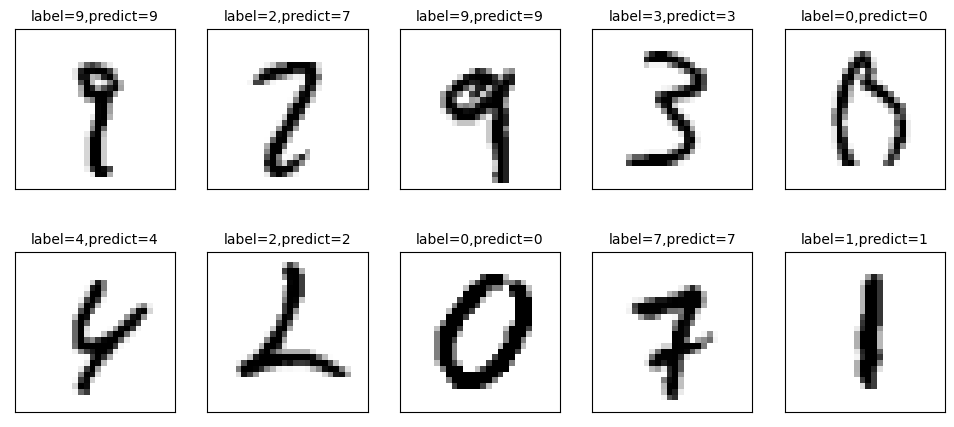

In [10]:
#(9)Prediction
prediction=np.argmax(model.predict(x_Test4D_normalize),axis=1)

# prediction=model.predict(x_Test4D_normalize)
# prediction=np.round(prediction).astype(float) 另一種寫法跟73一起，label和數字還是擠成一團

# prediction=(model.predict(x_Test4D_normalize)>0.5).astype("int32") label和數字還是擠成一團

# prediction=model.predict_classes(x_Test4D_normalize) 2021被遺棄的寫法

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=320)

In [11]:
#(10)Confusion matrix
df=pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])
print(df)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     1     0     0    1    0    0     1    1    0
1          0  1135     0     0    0    0    0     0    0    0
2          0     1  1028     0    0    0    0     3    0    0
3          0     0     0  1008    0    1    0     1    0    0
4          0     0     0     0  978    0    0     0    0    4
5          0     0     0     9    0  882    1     0    0    0
6          3     2     0     0    1    3  949     0    0    0
7          0     4     1     0    0    0    0  1022    1    0
8          2     0     1     3    0    2    0     1  963    2
9          0     2     1     3    8    3    0     2    0  990
